In [1]:
import os
from ctypes import CDLL, Structure, c_int, POINTER, byref
import matplotlib.pyplot as plt

k = 10  # Taille du tableau

In [2]:
# Refaire la structure c Array en utilisant ctypes pour la bibliothèque partagée
class Array(Structure):
    _fields_ = [("array", POINTER(c_int)),
                ("som_min_max", c_int),
                ("som_min_i", c_int),
                ("som_max_i", c_int),
                ("index_min", c_int),
                ("index_max", c_int),
                ("size", c_int),
                ("step", c_int)]

In [3]:
# Chargez la bibliothèque partagée
print(os.name)
if os.name == 'nt':  # Windows
    lib_path = './cmake-build-debug/libCalculSomMinMaxLib.dll'
else:
    lib_path = './cmake-build-debug/libCalculSomMinMaxLib.so'  # Unix-like

lib = CDLL(lib_path)

nt


In [4]:
# Créer une fonction pour visualiser chaque étape
def plot_step(step, fig=None, ax=None):
    if fig is None or ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
        own_figure = True
    else:
        own_figure = False

    frame = frames[step]
    arr, current_idx, highlighted_min_max, som_min_max, somme_min_i, somme_max_i = frame
    
    # if own_figure:
    ax.clear()  # Efface le contenu actuel des axes
    bars = ax.bar(range(len(arr)), arr, color='lightblue')
    for i, bar in enumerate(bars):
        if i == current_idx:
            bar.set_color('yellow')
        elif i in highlighted_min_max:
            bar.set_color('red')
        elif highlighted_min_max[0] < i < highlighted_min_max[1] or highlighted_min_max[0] > i > highlighted_min_max[1]:
            bar.set_color('green')
        else:
            bar.set_color('lightblue')
    
    ax.set(title=f"Étape {current_idx + 1}", xlabel="Index", ylabel="Valeur")
    ax.text(0.01, 0.95, f"Somme min-max: {som_min_max}", transform=ax.transAxes)
    ax.text(0.01, 0.90, f"Index min {highlighted_min_max[0]}, Min: {arr[highlighted_min_max[0]]}, Somme min i: {somme_min_i}", transform=ax.transAxes)
    ax.text(0.01, 0.85, f"Index max {highlighted_min_max[1]}, Max: {arr[highlighted_min_max[1]]}, Somme max i: {somme_max_i}", transform=ax.transAxes)
    
    if own_figure:
        plt.show()

In [5]:
# Créer une instance de la structure Array
arr = Array((c_int * k)(), 0, 0, 0, 0, 0, k, 0)
lib.insertion_aleatoire(arr)

frames = []

In [6]:
# Exécutez k étapes et enregistrez les résultats
for step in range(k):
    lib.calcul_som_min_max(byref(arr))

    array = []
    for index in range(arr.size):
        array.append(arr.array[index])
    frames.append((array, arr.step - 1, [arr.index_min, arr.index_max], arr.som_min_max, arr.som_min_i, arr.som_max_i))

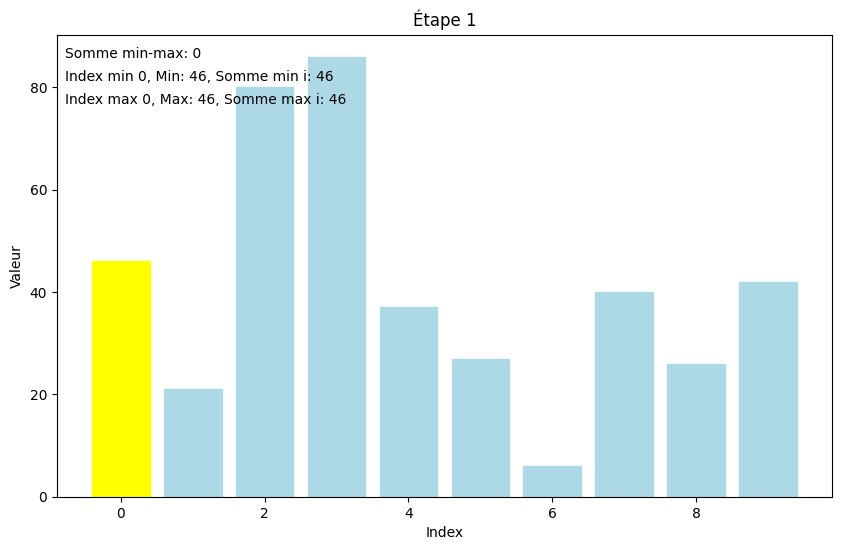

In [7]:
from ipywidgets import Image, HTML
# Utiliser une animation (GIF) pour visualiser chaque étape
from matplotlib.animation import FuncAnimation, PillowWriter

fig, ax = plt.subplots(figsize=(10, 6))

# Créez l'animation en utilisant la fonction modifiée
ani = FuncAnimation(fig, lambda step: plot_step(step, fig, ax), frames=len(frames), repeat=False,cache_frame_data=False)

# Sauvegardez l'animation
ani.save('sum_between_min_max_array.gif', writer=PillowWriter(fps=5))

In [8]:
# Utiliser interact pour visualiser chaque étape
from ipywidgets import interact, IntSlider

def interactive_plot_step(step):
    plot_step(step)
    
interact(interactive_plot_step, step=IntSlider(min=0, max=arr.size - 1, step=0, value=0))

interactive(children=(IntSlider(value=0, description='step', max=9, step=0), Output()), _dom_classes=('widget-…

<function __main__.interactive_plot_step(step)>